<a href="https://colab.research.google.com/github/GNuSeekK/ICTCOG/blob/main/4_05_%5B%EB%94%A5%EB%9F%AC%EB%8B%9D%5D_%EC%B6%9C%EB%A0%A5%EC%B8%B5_%EC%84%A4%EA%B3%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망의 사용처
**출력층의 활성화 함수에 따라서 신경망의 성질이 변화된다.**
* 분류를 할지 / 회귀를 할지에 대한 결정을 출력층의 활성화 함수가 결정 지어 준다.

## 신경망의 분류와 회귀
* 회귀
    * 출력층의 뉴런이 1개만 있어야 한다
    * **항등 함수**를 사용하면 회귀가 된다.
* 분류
    * 출력층의 뉴런의 개수는 분류할 클래스의 개수와 같으면 된다.
        * 강아지, 고양이, 말을 분류하는 신경망 => 뉴런 3개
        * MNIST 손글씨 데이터 세트를 분류하려면 : 10
    * 시그모이드 함수
        * 출력층의 뉴런이 1개일 때만 사용
        * 결괏값을 확률로 표현하고 싶을 때 사용
    * **소프트맥스 함수**
        * 분류 문제를 해결할 때 메인이 되는 출력층의 활성화 함수

# 소프트맥스 함수
$$
y_k = \frac{e^{z_k}}{\sum_{i=1}^{k} e^{z_i}}
$$

* $k$ : $k$번째 출력 ( 클래스 번호 ) 0, 1, 2 ....
* $z$ : 출력층에 있는 뉴런의 $WX+b$ 연산
* $n$ : 전체 클래스의 개수

In [ ]:
import numpy as np

z = np.array([0.3, 2.9, 4.0])

# 분자 부분 계산
exp_z = np.exp(z)

# 분모 부분 계산
sum_exp_z = np.sum(exp_z)

# 나누기
y = exp_z / sum_exp_z
###############
print(f'softmax의 결과 : {y}')

softmax의 결과 : [0.01821127 0.24519181 0.73659691]


In [ ]:
print(f'softmax 결과의 총합 : {np.sum(y)}')

softmax 결과의 총합 : 1.0


## softmax의 특징
1. 어떠한 실수 배열이 osftmax를 지나게 되면 그 배열의 총합은 언제나 1.0이 된다.
2. 총 합이 1.0이라는 것의 특징 : 각각의 클래스로 분류될 **확률**로 해석이 가능하다.
-----
$\sigma$함수, softmax함수의 가장 큰 차이
> $\sigma$ 함수는 이진 분류(binary classification)의 확률 <br/>softmax함수는 다중 분류(multiclass classification)의 확률

**softmax 함수는 단조함수이다**

데이터 a,b,c가 있고, $a < c < b$ 이고, 함수 $f(x)$가 있을 때 $f(a) < f(c) < f(b)$를 만족하면 함수 f는 단조함수 이다.

softmax는 단조함수 이기 때문에, **추론과정(predict)에서는 softmax를 넣지 않기도 한다.** 왜냐하면 어차피 뉴런의 계산($WX+b$)의 값이 제일 큰 뉴런으로 분류가 결정 될 것이 때문에.

**학습**시에는 softmax가 필수적으로 사용 되어야 한다. 이유는? **손실값(Loss)**을 구해야 하기 때문에....

In [ ]:
def softmax(z):
  exp_z = np.exp(z) # 분자
  sum_exp_z = np.sum(exp_z) # 분모
  y = exp_z / sum_exp_z

  return y

In [ ]:
z = np.array([0.3, 2.9, 4.0])
softmax(z)

array([0.01821127, 0.24519181, 0.73659691])

# 소프트맥스 함수의 튜닝
* 소프트맥스 함수는 자연상수 $e$의 지수 함수
* 입력값이 약간만 커져도 굉장히 큰 값을 연산 한다.
* 예시
  * $e^{10}$만 되어도 20000이 넘는 수
  * $e^{100}$은 0이 40개가 넘는 큰 숫자
  * $e^{1000}$은 무한대를 의미하는 `inf`


In [ ]:
big_z = [1000, 900, 1100]
softmax(big_z)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

제일 큰 수를 기준으로 나머지 원소들을 빼준 값으로 소프트맥스를 구해주면 된다.

In [ ]:
# 제일 큰 수 구하기 (상수 c로 명칭)
c = np.max(big_z)
print(big_z -c)

[-100 -200    0]


In [ ]:
# 튜닝된 소프트맥스 함수
def softmax(z):
    c = np.max(z) # 상수로 결정되는 C는 원소들 중 제일 큰 값을 기준으로 한다.

    exp_z = np.exp(z-c)
    sum_exp_z = np.sum(exp_z)

    y = exp_z / sum_exp_z
    
    return y

softmax(big_z)

array([3.72007598e-44, 1.38389653e-87, 1.00000000e+00])

# 출력층의 뉴런 수 정하기
* 출력층의 뉴런 개수는 **분류하고 싶은 클래스의 개수대로 설정**
  * `고양이, 강아지, 말`을 분류하는 모델을 만들려면 : 3개
  * `강아지, 고양이`를 분류하는 모델을 만들려면? : 2개 일 수도 있고, 1개 일 수도 있다.
    * 2개를 놓을 때는 softmax 함수를 출력 함수로 사용
    * 1개를 놓을 때는 sigmoid 함수를 출력 함수로 사용

# MNIST 손글씨 데이터셋 추론 모델 만들기
* `sample_weight.pkl` 파일에 이미 학습된 가중치 / 편향이 들어있다.
* 신경망의 학습은 최적의 가중치와 편향을 학습하는 것

Tensorflow MNIST 데이터 가져오기

In [ ]:
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [ ]:
mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


⭐⭐⭐데이터의 형상(`shape`) 부터 확인하기⭐⭐⭐

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

`(60000, 28, 28)` : `(이미지 개수, 세로크기, 가로크기)`

In [ ]:
image = X_train[0]
image.shape

(28, 28)

Text(0.5, 1.0, '5')

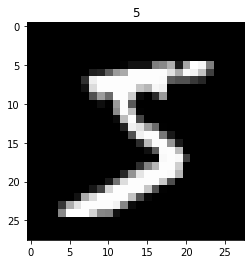

In [ ]:
# matplotlib 이미지 시각화
plt.imshow(image, 'gray')
plt.title(y_train[0])

**데이터를 신경망에 넣을 준비**
* 훈련, 테스트 모두 동일한 데이터의 **feature의 개수**를 가져야 한다.
    * `X_train.shape : (60000,28,28)`, `X_test.shape : (10000,28,28)`
    * `(이미지개수, 세로크기, 가로크기)` : `X_train`과 `X_test`의 세로 크기와 가로 크기의 개수가 일치해야 한다.
* 우리가 사용하고 있는 신경망은 평평하게 펴진 1차원 배열을 입력으로 받고 있다.
    * **평탄화(Flatten)** : 평평하게 하는 과정
* 평평하게 펴진 데이터를 입력으로 받아서 예측을 수행하는 레이어
    * 신경망 프레임워크(Tensorflow, Pytorch) - `Dense Layer`
    * 기하학(행렬 내적에 관련..) - `Affine Layer`
    * 논문이나 통합적으로 이야기 할 때 - `F.C layer` (Fully Connected Layer) 전결합(완전연결)계층

**신경망에 들어가는 형태로 배열 편집**

In [ ]:
# 1. numpy의 flatten을 이용한 평탄화
image = X_train[0].flatten()
image.shape

(784,)

In [ ]:
# 2. ravel을 활용한 평탄화 (잘 사용 안됨 ∵ 원본 이미지가 훼손될 우려)
image = np.ravel(X_train[0])
image.shape

(784,)

In [ ]:
# 3. reshape를 이용한 평탄화 : 제일 많이 쓰임. 데이터의 개수를 의미하는 '배치'를 고려하여 평탄화 가능
image = X_train[0].reshape(-1)
image.shape

(784,)

MNIST 손글씨 데이터세트를 위한 신경망 만들기 - Fully Connected Layer 방식
* 학습 없이 추론만 가능

In [ ]:
# 활성화 함수로 시그모이드
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_test_data():
    _, (X_test, y_test) = mnist.load_data()

    # 단순히 X_test로 리턴하면 안된다.( 10000, 28, 28 )이기 때문에..

    # 이미지 전체 개수
    IMAGE_COUNT = X_test.shape[0] # shape의 0번째가 의미하는 것은 항상 전체 데이터의 개수

    X_test_reshaped = X_test.reshape(IMAGE_COUNT, -1)

    return X_test_reshaped, y_test
    

def init_network():
    import pickle
    with open('/content/drive/MyDrive/ICTCOG 인공지능과정/Data/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    # 네트워크에 저장된 가중치와 편향
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 각 층은 입력되는 값과 해당층의 가중치와의 내적을 구하고 편향을 더한다
    # 계산된 결과에 각 층의 활성화 함수를 씌워주고 다음층으로 넘겨준다.

    # Layer 1 계산 ( input : x , 가중치 : W1 , 편향 : b1, 활성화 함수 : sigmoid, 출력 : A1 )
    z1 = x @ W1 + b1
    A1 = sigmoid(z1)

    # Layer 2 계산 ( input : A1 , 가중치 : W2 , 편향 : b2, 활성화 함수 : sigmoid, 출력 : A2 )
    z2 = A1 @ W2 + b2
    A2 = sigmoid(z2)

    # Layer 3 계산 ( input : A2 , 가중치 : W3 , 편향 : b3, 활성화 함수 : softmax, 출력 : y )
    z3 = A2 @ W3 + b3
    y = softmax(z3)

    return y

## 데스트 데이터는 어떻게 가져와야 하는가?


### 신경망에 입력될 수 있는 형태로 가져와야 한다

-----
신경망에 이미지 데이터를 입력할 수 있는 경우 확인
* 장수에 대한 정보 (데이터의 개수) 없이 세로(H), 가로(W) 픽셀의 정보만 있는 상황 : `(28,28)` - 입력이 불가(2차원 배열이라 못 들어간다)
* 장수에 대한 정보 없이 2차원 이미지 배열을 **평탄화**시킨 상황 : `(784,)` - 입력을 일단 허용
    * Tensorflow, PyTorch, Scikit-Learn 같은 머신러닝 라이브러리에서는 허용 하지 않는다.
    * 1장만 넣더라도 `(1, 784)`로 만들어 줘야 정상적으로 작동
-----
Fully Connected Layer에 `60000`장의 `(28,28)`형식의 이미지 데이터를 넣고 싶은 경우, 즉 `(60000,28,28)` 데이터를 넣는 경우
* 장수 데이터가 있는 상황에서 가로 세로 픽셀에 대한 정보만 있는 상황 : `(60000,28,28)` - 입력 불가
* 장수 데이터가 있는 상황에서 **평탄화**시킨 상황 : `(60000,784)` : 입력 가능
-----
입력 되는 데이터의 차원이 `(N,M)` 이면 전결합 계층(F.C Layer)에 집어 넣을 수 있다.
* `N` : BATCH_SIZE(데이터의 개수)
* `M` : 데이터 스칼라의 개수
    * 배치를 이야기 하지 않은 경우 : `(M,)`
    * 배치를 이야기 한 경우 : `(N,M)`⭐⭐

In [ ]:
# 테스트 데이터를 신경망에 집어 넣을 수 있는 형식으로 작성
X_test = X_test.reshape(10000,-1)
X_test.shape

(10000, 784)

In [ ]:
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']
b1, b2, b3 = network['b1'], network['b2'], network['b3']

print(W1.shape, W2.shape, W3.shape, end = '\n\n')
print(b1.shape, b2.shape, b3.shape)

(784, 50) (50, 100) (100, 10)

(50,) (100,) (10,)


* 1층
    * input : 784
    * output : 50 (neuron)
* 2층
    * input : 50
    * output : 100 (neuron)
* 3층
    * input : 100
    * output : 10 (neuron)


# 완성된 네트워크 확인하기

1. 예측(predict)만 해보기

In [ ]:
# 네트워크 가져오기
net = init_network()

# 테스트 데이터 가져오기
X, t = get_test_data()

# 한장씩만 가져오기
IMAGE_IDX = 0

test_img, test_lbl = X[IMAGE_IDX], t[IMAGE_IDX]

test_img.shape, test_lbl

((784,), 7)

In [ ]:
# 테스트 이미지 시각화 해보기
img_bokgu = test_img.reshape(28,28)
img_bokgu.shape

(28, 28)

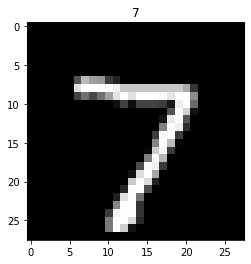

In [ ]:
plt.imshow(img_bokgu, cmap = 'gray')
plt.title(test_lbl)
plt.show()

In [ ]:
test_result = predict(net, test_img)

# test_result에는 softmax의 결과물이 들어있음
#  test_result에 대한 10개 숫자의 각각의 확률이 들어있다!
#  [0번클래스의확률, 1번클래스의확률, 2번클래스의확률, ... ,9번클래스의확률]

print("예측된 softmax의 결과 : \n{}".format(test_result))
print("예측된 label 확인 : {}".format(np.argmax(test_result))) # argmax : 배열에서 가장 값이 큰 곳의 인덱스를 반환
print("정답 : {}".format(test_lbl))

예측된 softmax의 결과 : 
[4.2879005e-06 4.5729317e-07 1.8486280e-04 8.3605024e-05 1.5084674e-07
 6.3182205e-07 4.5782045e-10 9.9919468e-01 3.8066935e-07 5.3083024e-04]
예측된 label 확인 : 7
정답 : 7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


# 신경망의 정확도 측정

In [ ]:
X, t = get_test_data()

net = init_network()
acc_count = 0 # 정답을 맞춘 개수를 저장. 정답을 맞추면 카운트가 1씩 증가

# X에서 사진을 한장씩 꺼내서 테스트

for i in range(len(X)):
  pred = predict(net, X[i]) # pred의 shape : (10, )
  pred_result = np.argmax(pred) # 확률이 가장 높은 원소의 인덱스

  acc_count += (pred_result == t[i]) # 정답이면 1씩 acc_count를 증가

print(float(acc_count / len(X)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.9207


위 코드의 단점
* 10,000장의 이미지를 한 장씩 예측하고 있다.
* 시간이 오래 걸린다. 어떻게 해결이 가능 할까?
    * **BATCH**를 사용해서 한 장씩이 아닌 **데이터의 묶음**으로 예측
    * 배치 : 데이터의 뭉터기
    * 배치로 설정한 데이터의 개수 만큼 **병렬**로 처리 되기 떄문에 빠르다.

In [ ]:
# 배치를 이용한 예측
X, t = get_test_data()

net = init_network()

# 배치란? 데이터의 묶음
# batch_size : 1 배치당 들어있어야 하는 데이터의 개수
# 60,000개의 데이터를 batch_size 100으로 묶으면 몇 개의 배치가 만들어 질까? => 600개

batch_size = 100
acc_count = 0

for i in range(0, len(X), batch_size):
    X_batch = X[i : i + batch_size] # X_batch의 shape은 항상 (100, 784)

    pred_batch = predict(net,X_batch) # pred_batch의 shape : (100, 10) - 100장씩 예측한 10개의 결과물
    pred_batch_result = np.argmax(pred_batch, axis = 1)

    acc_count += np.sum(pred_batch_result == t[i : i+batch_size])

print(float(acc_count/len(X)))

0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
